In [14]:
# Import Dependencies
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from numpy import log as ln

In [15]:
# Import our data into pandas from CSV.
s_p_500 = '../CSV_files/SP500.csv'
tbill_int_rate = '../CSV_files/TB3MS.csv'

# Read the S&P 500 and T-bill CSV file into a pandas DataFrame.
s_p_500_df = pd.read_csv(s_p_500, low_memory=False)
tbill_int_rate_df = pd.read_csv(tbill_int_rate, low_memory=False)

# Merge databases.
complete_df = pd.merge(s_p_500_df, tbill_int_rate_df, how="inner")


In [16]:
# Convert the "DATE" column to a datetime data type and store it in a new "month" column.
tbill_int_rate_df["month"] = pd.to_datetime(tbill_int_rate_df["DATE"])

# Extract the year and month from the "month" column and convert it to a period with monthly frequency.
tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.to_period("M")

# Format the "month" column to display the date in the 'MM/YYYY' format (e.g., '01/2023')
tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.strftime('%m/%Y')


<function matplotlib.pyplot.show(close=None, block=None)>

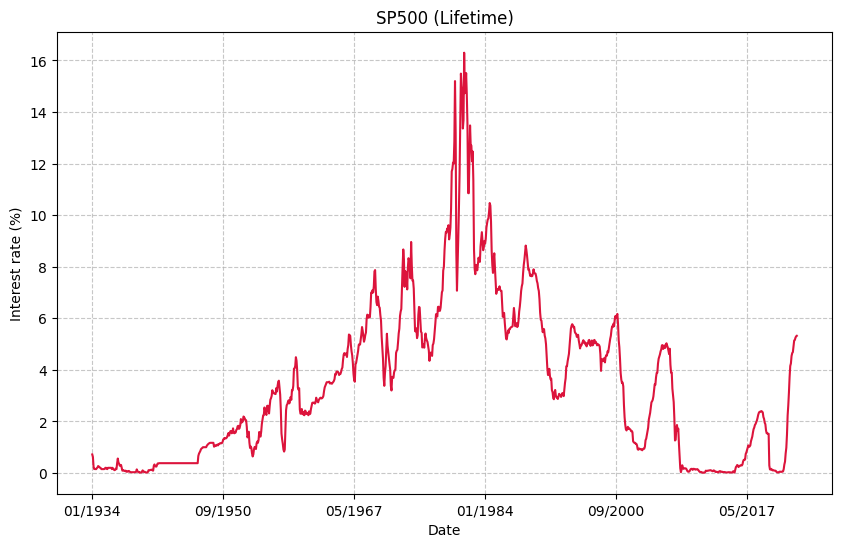

In [17]:
# Data
x = tbill_int_rate_df["month"]
y = tbill_int_rate_df["TB3MS"]

# Set the figure size (adjust the width and height as needed)
fig, ax = plt.subplots(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Plotting
plt.plot(x,y, color="#DC143C", linestyle='-', alpha=1)

# Titles
plt.title("SP500 (Lifetime)")
plt.xlabel("Date")
plt.ylabel("Interest rate (%)")

# Customizations
plt.xticks(np.arange(0, len(x)+1, 200))
plt.grid(True, linestyle='--', alpha=0.7)

# Save the graph
plt.savefig("../Charts/SP500_chart.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

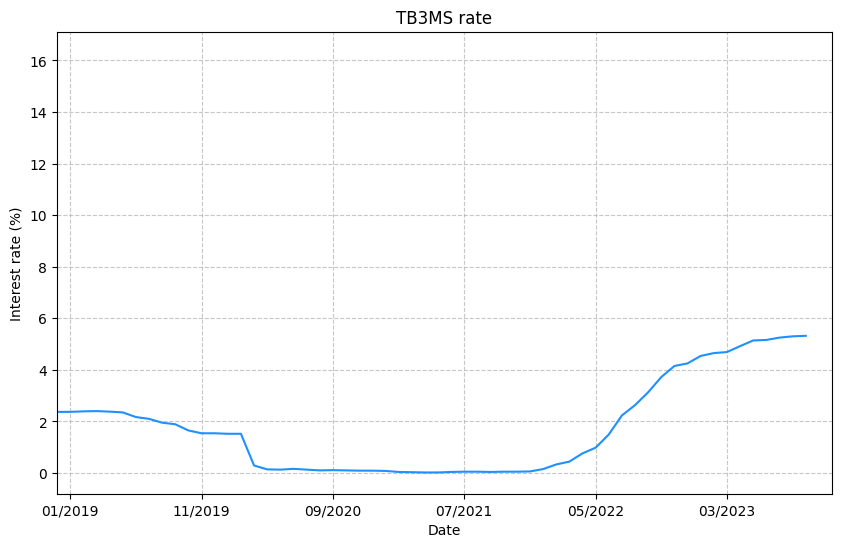

In [18]:
# Data
x = tbill_int_rate_df["month"]
y = tbill_int_rate_df["TB3MS"]

# Set the figure size (adjust the width and height as needed)
fig, ax = plt.subplots(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Plotting
plt.plot(x,y, color="#1E90FF", linestyle='-', alpha=1)

# Titles
plt.title("TB3MS rate")
plt.xlabel("Date")
plt.ylabel("Interest rate (%)")

# Customizations
plt.xticks(np.arange(0, len(x)+1, 10))
plt.xlim(1019,1078)
plt.grid(True, linestyle='--', alpha=0.7)

# Save the graph
plt.savefig("../Charts/TB3MS_short_date_chart.png")

plt.show

In [19]:
# Convert date
s_p_500_df["month"] = pd.to_datetime(s_p_500_df["DATE"])

In [20]:
# Drop rows with NaN (empty) values in the 'SP500' column
s_p_500_df["SP500"] = pd.to_numeric(s_p_500_df["SP500"], errors="coerce")
s_p_500_df["number"] = s_p_500_df["SP500"].astype(float)
s_p_500_df = s_p_500_df[~s_p_500_df['SP500'].isna()]


In [21]:
# Set the "Date" column as the DataFrame's index.
s_p_500_df.set_index('month', inplace=True)

# Resample the data to monthly frequency and calculate the mean for each month.
monthly_avg = s_p_500_df['number'].resample('M').mean()

# Reset the index to make "Date" a column again.
monthly_avg = pd.DataFrame({'month': monthly_avg.index, 'average_number': monthly_avg.values})


<function matplotlib.pyplot.show(close=None, block=None)>

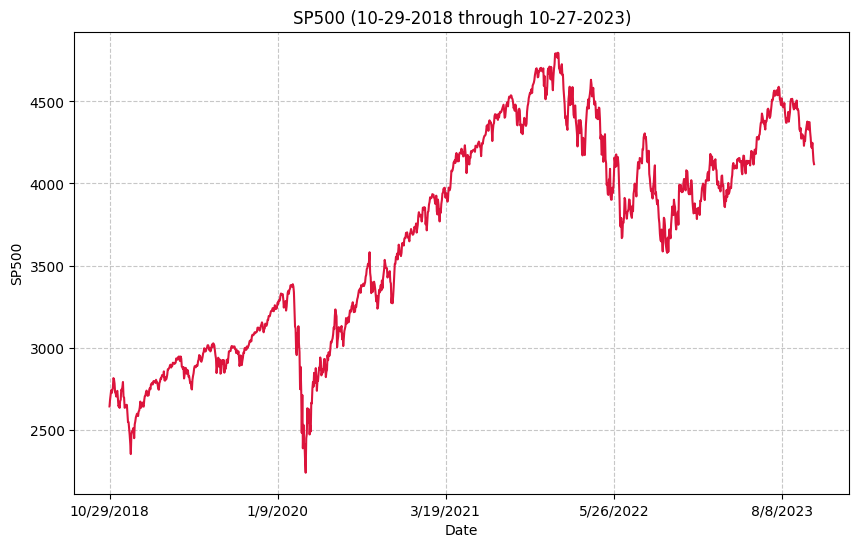

In [22]:
# Data
x = s_p_500_df["DATE"]
y = s_p_500_df["SP500"]

# Set the figure size (adjust the width and height as needed)
fig, ax = plt.subplots(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches
# Plotting
plt.plot(x,y, color="#DC143C", linestyle='-', alpha=1)

# Titles
plt.title("SP500 (10-29-2018 through 10-27-2023)")
plt.xlabel("Date")
plt.ylabel("SP500")

# Customizations
plt.xticks(np.arange(0, len(x)+1, 300))
plt.grid(True, linestyle='--', alpha=0.7)

# Save the graph
plt.savefig("../Charts/SP500_short_date_chart.png")

plt.show